# Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder ,RobustScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


# Reading CSV data

In [ ]:
df = pd.read_csv('Prediction Models/sleep_disorder_predictor/data/dataset.csv')

# EDA

In [33]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [34]:
df.shape

(374, 13)

In [35]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [36]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [37]:
columns = [column for column in df.columns if column!='Person ID']

In [38]:
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

In [39]:
# Replace NaN in 'Sleep Disorder' with 'No Disorder'
df['Sleep Disorder'].fillna('No Disorder', inplace=True)


In [40]:
# Value counts of 'Sleep Disorder'
sleep_disorder_counts = df['Sleep Disorder'].value_counts()

print("Value counts of 'Sleep Disorder':")
print(sleep_disorder_counts)

Value counts of 'Sleep Disorder':
Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [41]:
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
df['BMI Category'].value_counts()

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

In [42]:
# bmi_counts = df['BMI Category'].value_counts()
fig = px.histogram(data_frame=df, x = 'BMI Category', color = 'Sleep Disorder', title='Bar Chart of BMI Category Counts')
fig.show()


- Obese suffer from Insomnia and Sleep Apnea
- Very few overweighted people have no sleep disorder
- Very few people of normal weight face sleep disorder 

In [43]:
fig = px.histogram(data_frame=df, x = 'Quality of Sleep', color = 'Sleep Disorder', title='Bar Chart of BMI Category Counts')
fig.show()

In [44]:
fig = px.histogram(data_frame=df, x = 'Occupation', color = 'Sleep Disorder', title='Bar Chart of BMI Category Counts')
fig.show()

Occupation of Nurse,Teacher, Sales person and sales representative are prone to sleep disorder

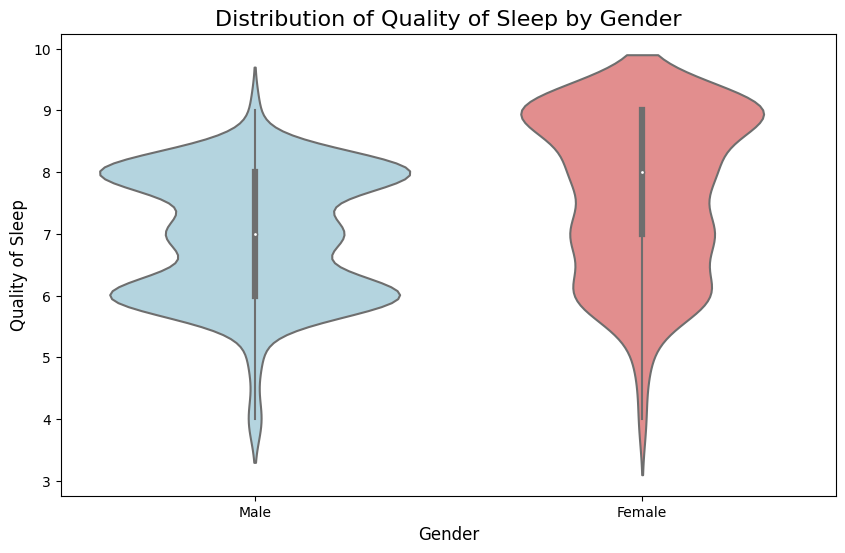

In [45]:
color_palette = {'Male': 'lightblue', 'Female': 'lightcoral'}
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Quality of Sleep', data=df, palette=color_palette)
plt.title('Distribution of Quality of Sleep by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.show()

In [49]:
fig = px.bar(df, 
             x='Stress Level', 
             y='Quality of Sleep', 
             color='Stress Level',
             title='Relationship between Stress Level and Quality of Sleep'
            )
fig.show()

**Splitting Blood Pressure into two columns: Systolic and Diastolic**

In [18]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'Systolic', 1: 'Diastolic'})

In [19]:
df['Systolic'] = df['Systolic'].astype(float)
df['Diastolic'] = df['Diastolic'].astype(float)

In [20]:
numeric_features = ['Age', 'Sleep Duration', 
                    'Physical Activity Level', 
                    'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

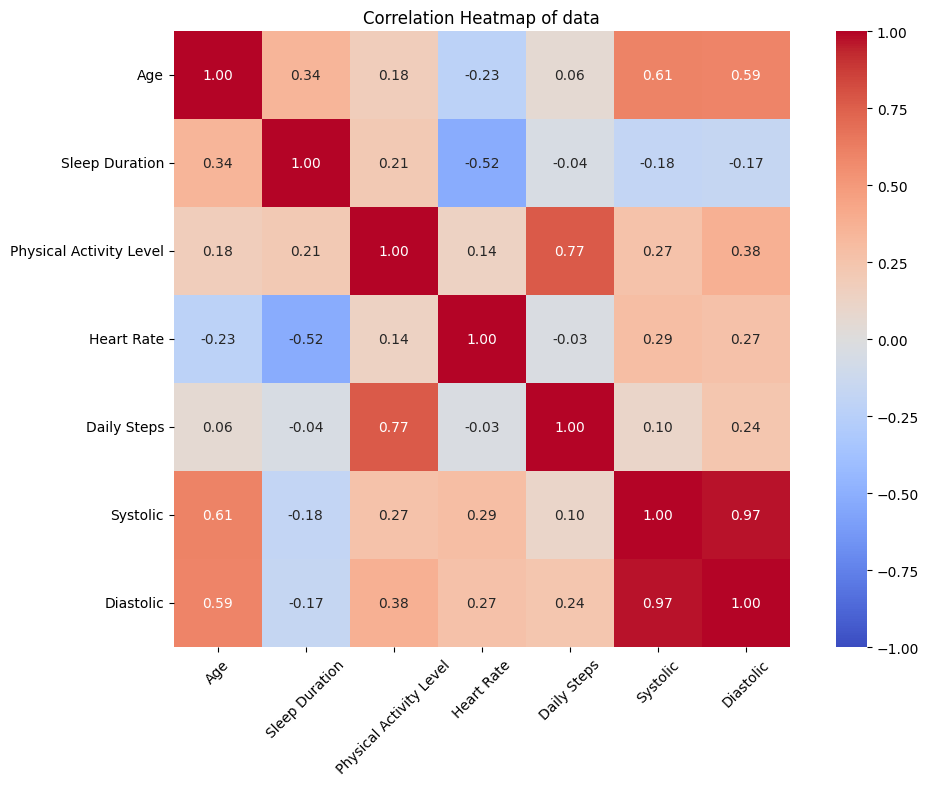

In [21]:
# Calculate the correlation matrix
corr_matrix = df[numeric_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap without the mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, square=True)

# Customize plot labels and title
plt.title('Correlation Heatmap of data')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()


In [22]:
df.drop(columns=['Person ID'],inplace = True)

In [23]:
label_encoder = LabelEncoder()
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Preprocessing

In [24]:
numeric_features = ['Age', 'Sleep Duration',  
                    'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

categorical_features = ['Occupation','Quality of Sleep','Gender', 
                    'Physical Activity Level', 'Stress Level', 'BMI Category']


In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',sparse_output =False, handle_unknown='ignore'), categorical_features)
    ])

In [26]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [27]:
X_preprocessed = preprocessor.fit_transform(X)

# Handling Imbalance Data - SMOTE

In [28]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)
X_smote.shape

(657, 44)

In [29]:
# Splitting the data into training and testing sets (e.g., 75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# Model Training

> Logistic Regression

Accuracy: 0.9090909090909091
Precision: 0.910767756617559
Recall: 0.9090909090909091
F1-score: 0.9084234273263184
              precision    recall  f1-score   support

           0       0.94      0.82      0.87        38
           1       0.88      0.95      0.92        64
           2       0.92      0.92      0.92        63

    accuracy                           0.91       165
   macro avg       0.91      0.90      0.90       165
weighted avg       0.91      0.91      0.91       165

Confusion Matrix:
[[31  3  4]
 [ 2 61  1]
 [ 0  5 58]]


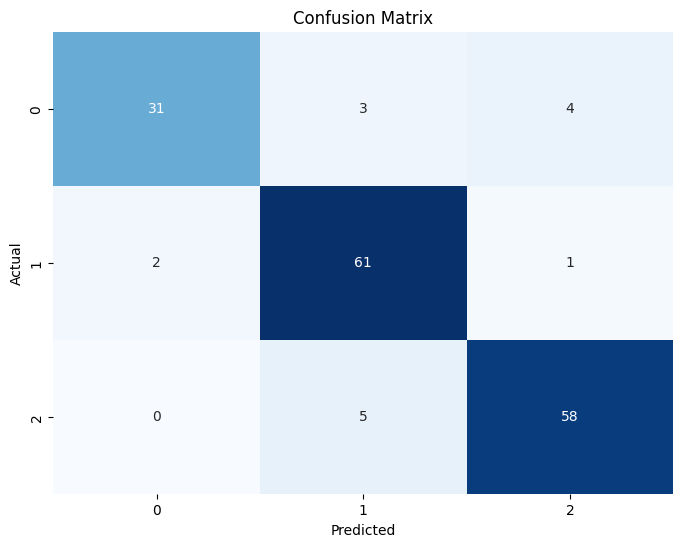

In [30]:

# Initialize Logistic Regression classifier
model_lr = LogisticRegression()

# Fit the model on the training data
model_lr.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1-score: {f1_lr}')

# Generate classification report
print(classification_report(y_test, y_pred_lr))

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(cm_lr)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


> XGB Classifier

Accuracy: 0.9272727272727272
Precision: 0.9287307861220904
Recall: 0.9272727272727272
F1-score: 0.9271254483064495
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.90      0.97      0.93        64
           2       0.97      0.92      0.94        63

    accuracy                           0.93       165
   macro avg       0.93      0.92      0.92       165
weighted avg       0.93      0.93      0.93       165

Confusion Matrix:
[[33  3  2]
 [ 2 62  0]
 [ 1  4 58]]


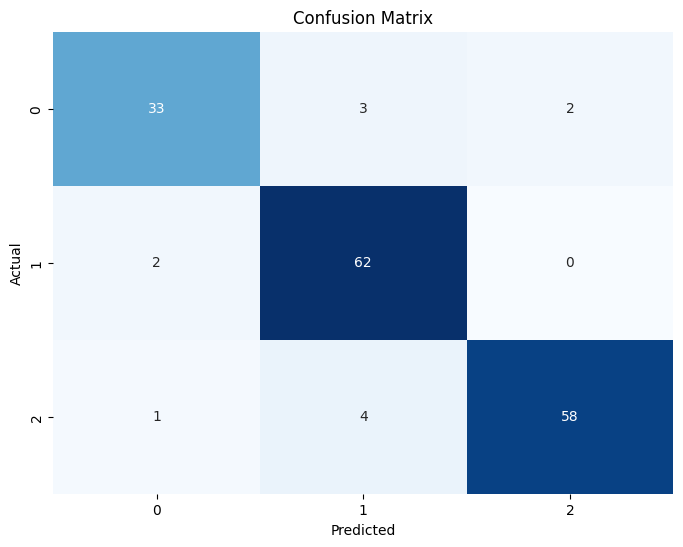

In [31]:
# Initialize XGBoost classifier (assuming classification task)
model_xgb = xgb.XGBClassifier()

# Fit the model on the training data
model_xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = model_xgb.predict(X_test)
# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted')
recall_xgb = recall_score(y_test, y_pred, average='weighted')
f1_xgb = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy_xgb}')
print(f'Precision: {precision_xgb}')
print(f'Recall: {recall_xgb}')
print(f'F1-score: {f1_xgb}')

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


> Cross Eval XGB Model

In [32]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_model, X_smote, y_smote, cv=cv, scoring='accuracy')

In [33]:
scores

array([0.92424242, 0.89393939, 0.93129771, 0.9389313 , 0.92366412])

> Gradient Boosting Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.90      0.97      0.93        64
           2       0.95      0.90      0.93        63

    accuracy                           0.92       165
   macro avg       0.91      0.91      0.91       165
weighted avg       0.92      0.92      0.91       165



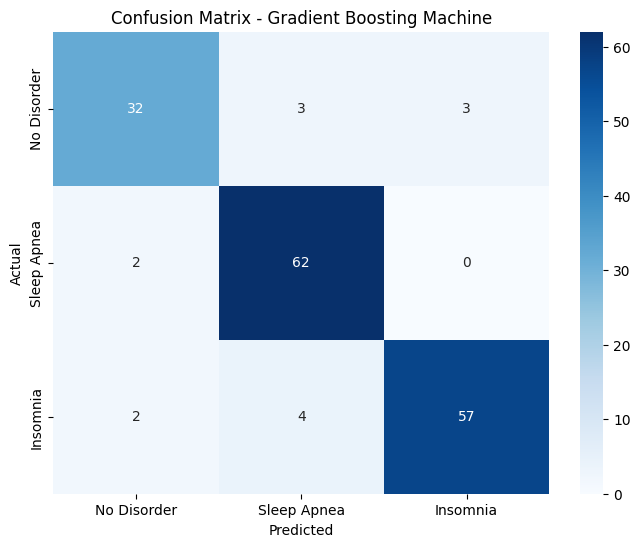

Accuracy: 0.9152
Precision: 0.9160
Recall: 0.9152
F1 Score: 0.9147


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GBM classifier
gbm_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_clf.fit(X_train, y_train)

# Predictions
y_pred = gbm_clf.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred)
precision_gbm = precision_score(y_test, y_pred, average='weighted')
recall_gbm = recall_score(y_test, y_pred, average='weighted')
f1_gbm = f1_score(y_test, y_pred, average='weighted')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Machine')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")



> K Neighbors Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.88      0.95      0.92        64
           2       0.97      0.92      0.94        63

    accuracy                           0.92       165
   macro avg       0.92      0.91      0.92       165
weighted avg       0.92      0.92      0.92       165



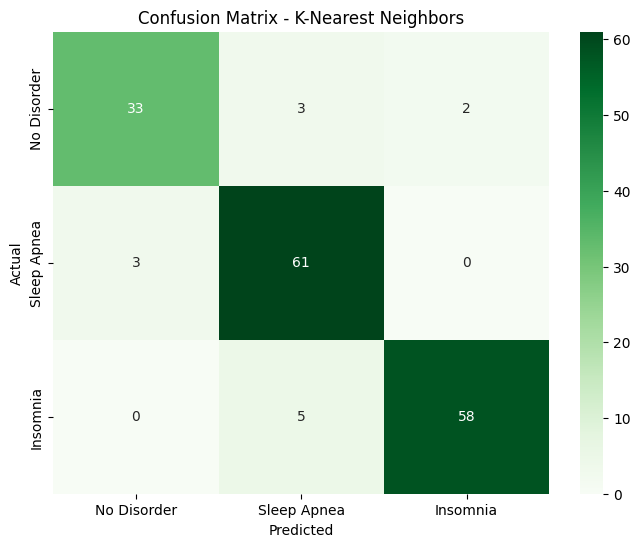

Accuracy: 0.9212
Precision: 0.9231
Recall: 0.9212
F1 Score: 0.9213


In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier (example using k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train, y_train)

# Predictions
y_pred = knn_clf.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

# Model Comparison

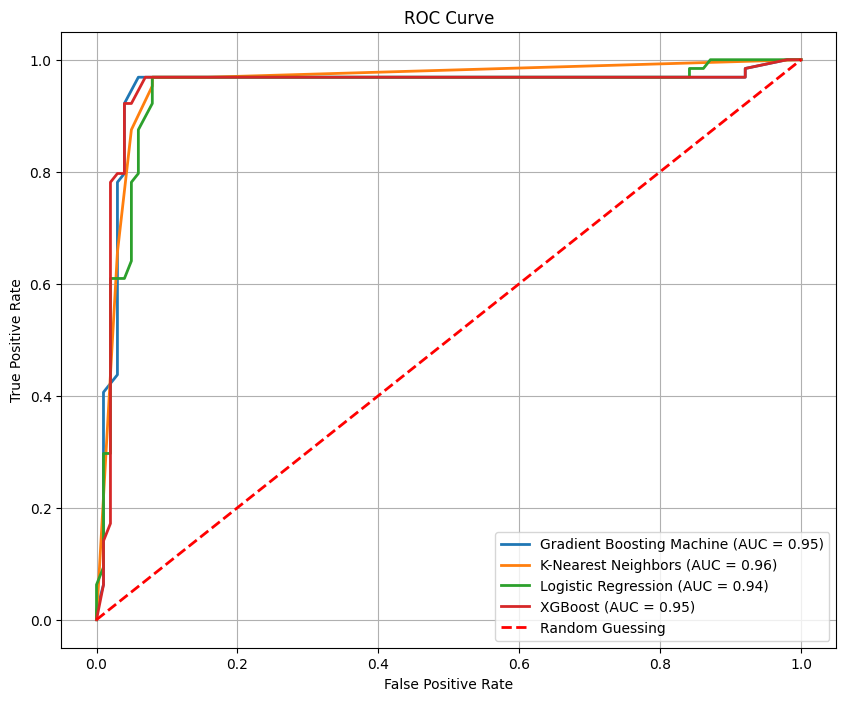

In [36]:
from sklearn.metrics import roc_curve, auc

# Initialize figure
fig_roc = plt.figure(figsize=(10, 8))
models = ['Gradient Boosting Machine', 'K-Nearest Neighbors', 'Logistic Regression', 'XGBoost']

# Plot ROC curve for each model
for idx, model in enumerate([gbm_clf, knn_clf, model_lr, model_xgb]):
    if model == knn_clf:
        y_scores = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1], pos_label=1)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)

    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{models[idx]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show plot
plt.show()


# Saving Model

In [ ]:
# Save the model to a file
import pickle
with open("Model_Prediction.sav", "wb") as f:
    pickle.dump(model_xgb,f)

In [40]:
with open('preprocessor.sav', 'wb') as f:
    pickle.dump(preprocessor, f)